# Group 41
Jose Eduardo De Moraes Lopez

Camila Navarro Llaven

# SPOTIFY

In [ ]:
!pip install plotly

In [ ]:
from google.colab import drive
import os as os
drive.mount("/content/drive")
# change dir#
path = '/content/drive/My Drive/SpotifyData/'
os.chdir(path)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
file_name = '/content/drive/MyDrive/SpotifyData/chartmastersdata.csv'
df = pd.read_csv(file_name, header=None)
df.columns = ['Song/Artist', 'Streams', 'Year']
df.head()

,Song/Artist,Streams,Year
0,Shape of You\nEd Sheeran,"3,758,827,279",2017
1,Believer\nImagine Dragons,"2,820,598,752",2017
2,Perfect\nEd Sheeran,"2,792,620,169",2017
3,Something Just Like This\nThe Chainsmokers,"2,397,553,538",2017
4,Thunder\nImagine Dragons,"2,232,488,028",2017


In [ ]:
# Splitting the songname column into two using the "\n" delimiter
df[['Song', 'Artist']] = df['Song/Artist'].str.split('\n', 1, expand=True)
# Drop the original column if you want
df.drop('Song/Artist', axis=1, inplace=True)
df.head()

<ipython-input-5-2a17371e87e6>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Song', 'Artist']] = df['Song/Artist'].str.split('\n', 1, expand=True)


,Streams,Year,Song,Artist
0,"3,758,827,279",2017,Shape of You,Ed Sheeran
1,"2,820,598,752",2017,Believer,Imagine Dragons
2,"2,792,620,169",2017,Perfect,Ed Sheeran
3,"2,397,553,538",2017,Something Just Like This,The Chainsmokers
4,"2,232,488,028",2017,Thunder,Imagine Dragons


In [ ]:
df.sort_values('Streams', inplace = True)
df

,Streams,Year,Song,Artist
352,"1,001,095,261",2015,Want to Want Me,Jason Derulo
458,"1,003,249,073",2014,Outside (feat. Ellie Goulding),Calvin Harris
656,"1,004,245,820",2011,"Give Me Everything (feat. Ne-Yo, Afrojack & Na...",Pitbull
606,"1,005,018,313",2012,Don't You Worry Child - Radio Edit,Swedish House Mafia
65,"1,007,122,253",2017,Murder on My Mind,YNW Melly
...,...,...,...,...
239,"987,448,579",2016,Go Flex,Post Malone
67,"989,206,836",2017,Infinity,Jaymes Young
701,"992,109,371",2010,Dynamite,Taio Cruz
66,"993,571,699",2017,Slide (feat. Frank Ocean & Migos),Calvin Harris


In [ ]:
df['Streams'] = [int(x.replace(',', '')) for x in df['Streams']]

# Distribution plots


In [ ]:
import plotly.express as px

view_counts = df['Streams']

# Plotting distribution
fig = px.histogram(view_counts, nbins=50)

# Display the plot
fig.show()

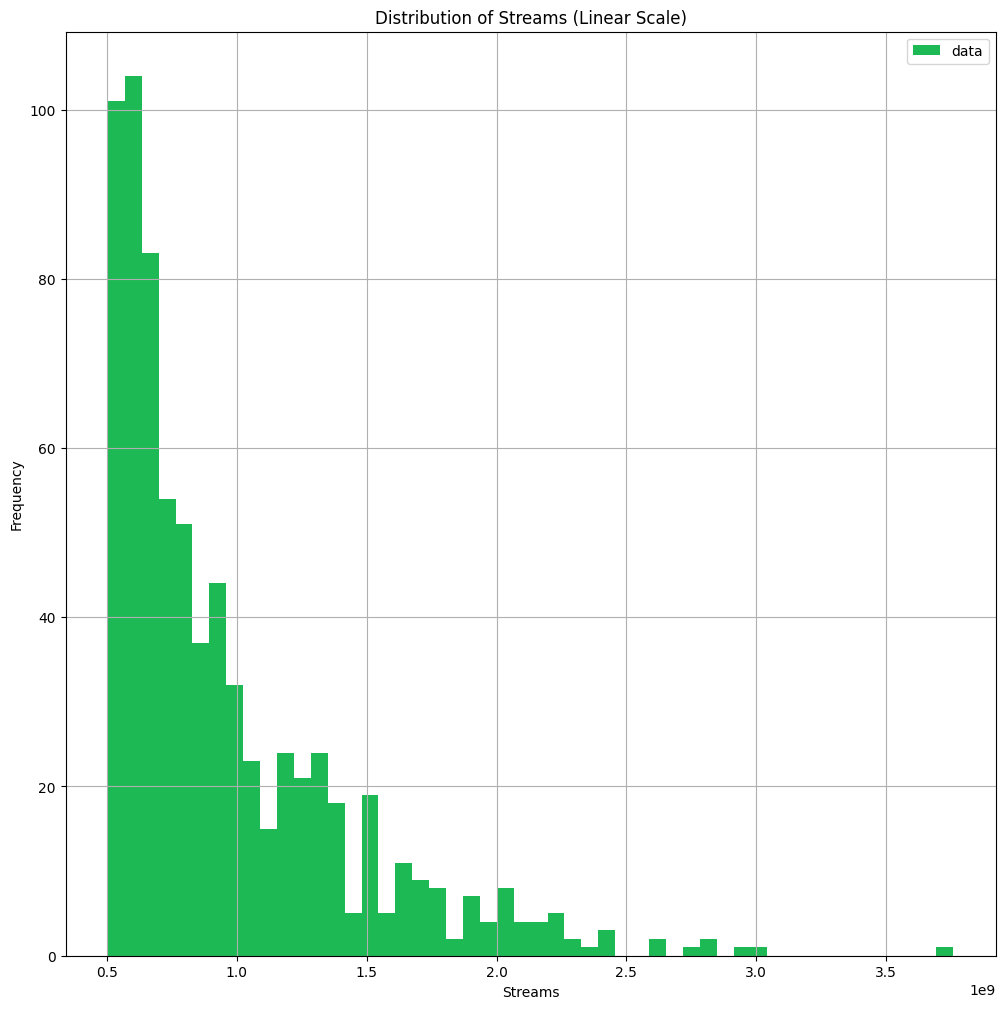

In [ ]:
view_counts = df['Streams']

fig, ax = plt.subplots(figsize=(12, 12))

# Plotting in linear scale
ax.hist(view_counts, bins=50, color='#1DB954', label='data')

# Add a legend and show the plot
ax.grid(True)
ax.legend()

# Set titles and labels
ax.set_title('Distribution of Streams (Linear Scale)')
ax.set_xlabel('Streams')
ax.set_ylabel('Frequency')
ax.grid(True)
ax.legend()

plt.show()

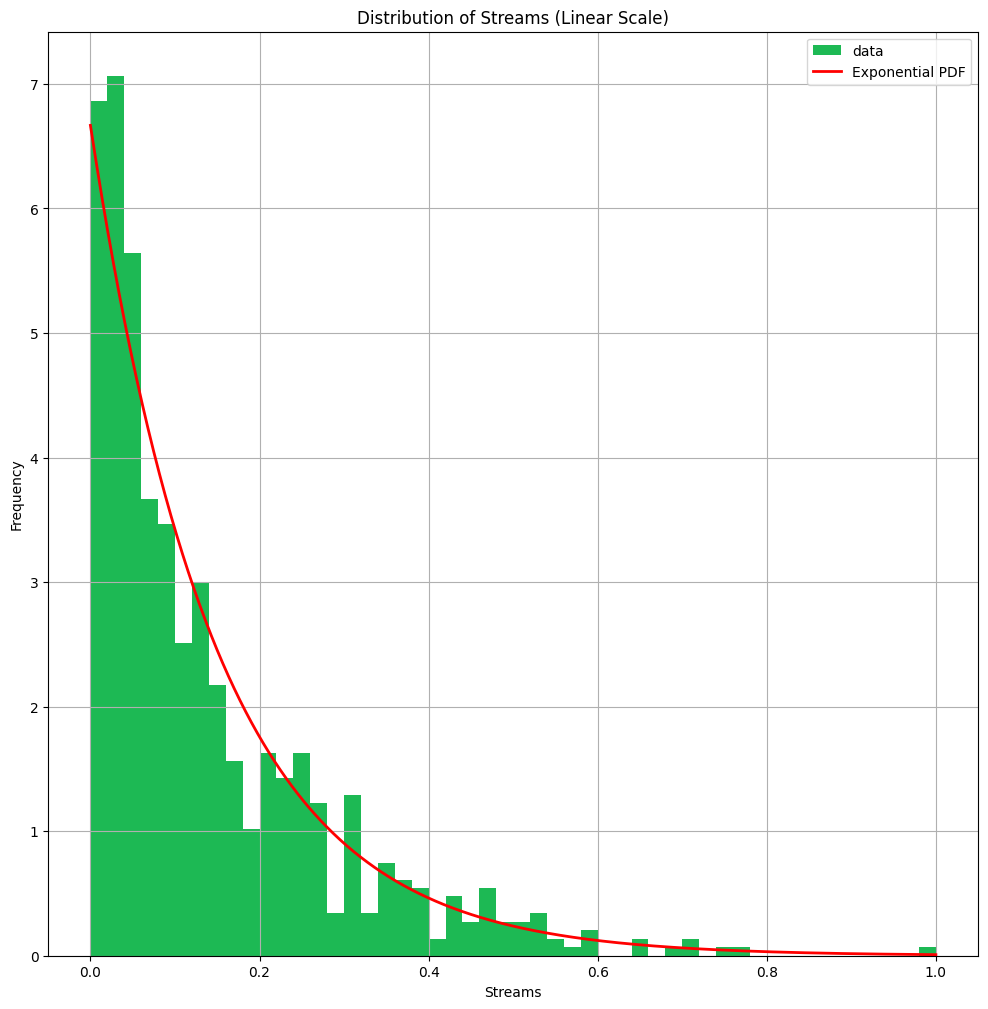

In [ ]:
from scipy.stats import expon, norm

norm_view_counts = (view_counts-min(view_counts))/(max(view_counts)-min(view_counts))

fig, ax = plt.subplots(figsize=(12, 12))

# Plotting in linear scale
ax.hist(norm_view_counts, bins=50, color='#1DB954', label='data', density=True)

x = np.linspace(min(norm_view_counts), max(norm_view_counts), len(norm_view_counts))
exp_pdf = expon.pdf(x, scale=.15)

# Adding exponential and normal distribution lines to the histogram
ax.plot(x, exp_pdf, 'red', lw=2, label='Exponential PDF')

# Add a legend and show the plot
ax.grid(True)
ax.legend()

# Set titles and labels
ax.set_title('Distribution of Streams (Linear Scale)')
ax.set_xlabel('Streams')
ax.set_ylabel('Frequency')
ax.grid(True)
ax.legend()

plt.show()

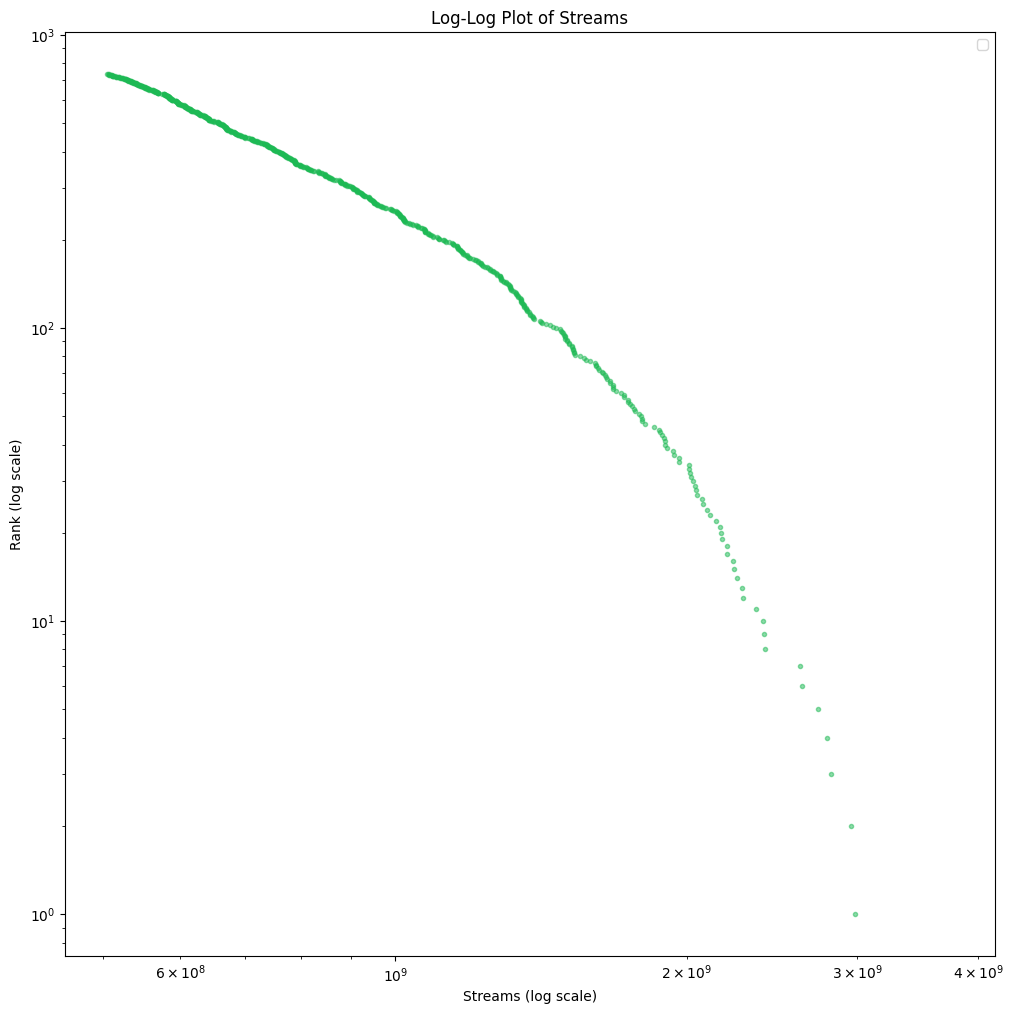

In [ ]:
# Plotting log-log plot

fig, ax = plt.subplots(figsize=(12, 12))

view_counts_sorted = view_counts.sort_values(ascending=False)
ax.scatter(view_counts_sorted, range(len(view_counts_sorted)), alpha=0.5, marker='.', color = '#1DB954')

ax.set_title('Log-Log Plot of Streams')
ax.set_xlabel('Streams (log scale)')
ax.set_ylabel('Rank (log scale)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

plt.show()

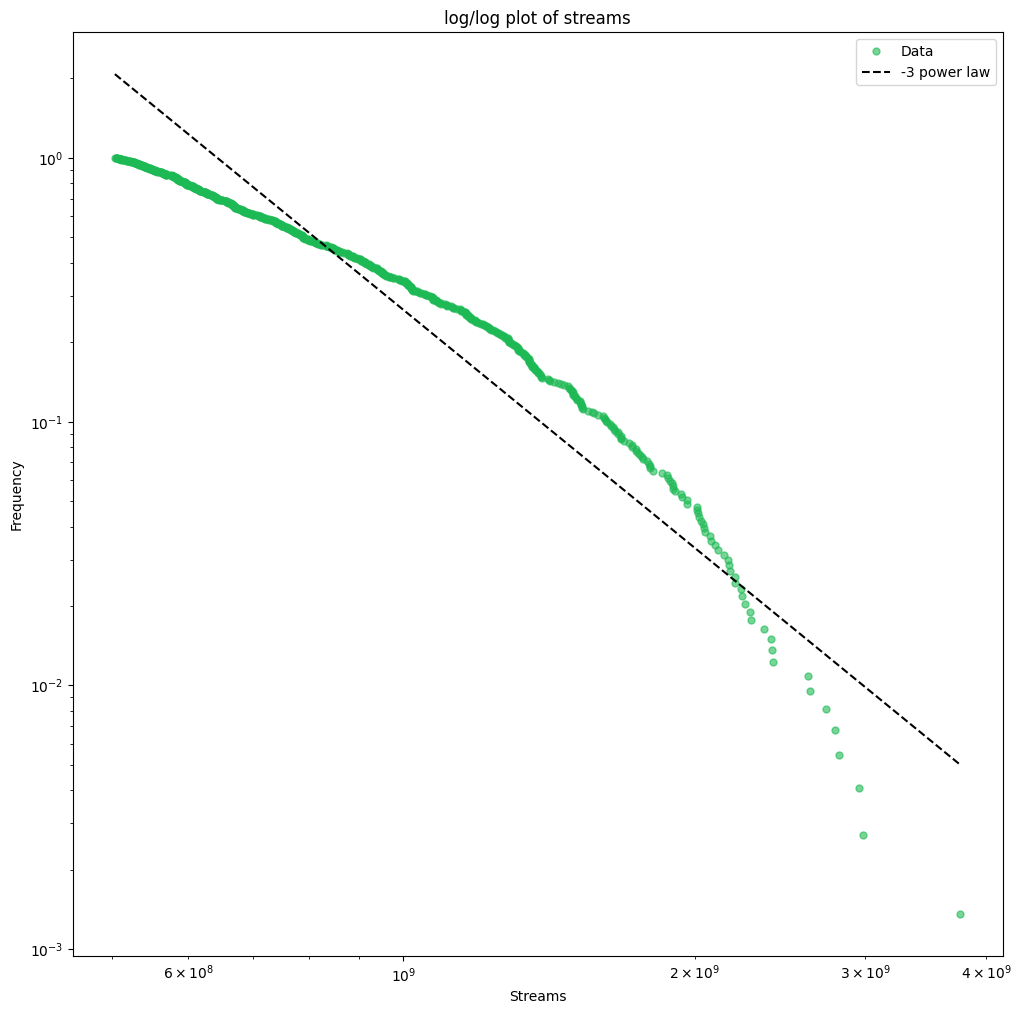

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

x_data = np.sort(view_counts)
y_data = np.arange(1, len(view_counts)+1) / len(view_counts)

# Scatter plot on log-log scale
ax.loglog(x_data, y_data[::-1], color = '#1DB954', alpha=0.6, linestyle='', marker='o', markersize=5, label='Data')

# To add a power-law reference line with a slope of -3, we create a line in log-space
# that we know will have that slope when plotted on a log-log scale.
x_ref = np.array([min(view_counts), max(view_counts)])
y_ref = (x_ref / max(view_counts)) ** -3  # slope of -3 on a log-log scale

# Adjust the y_ref to lower the line
adjustment_factor = 0.005  # Lower this factor to lower the line further
y_ref = y_ref * adjustment_factor

# Plot the reference line
ax.loglog(x_ref, y_ref, 'k--', label='-3 power law')

# Label axes
ax.set_xlabel('Streams')
ax.set_ylabel('Frequency')
ax.set_title('log/log plot of streams')

# Add legend
ax.legend()

# Show the plot
plt.show()


# Statistical tests

In [ ]:
!pip install powerlaw

In [ ]:
view_counts

352    1001095261
458    1003249073
656    1004245820
606    1005018313
65     1007122253
          ...    
239     987448579
67      989206836
701     992109371
66      993571699
657     997052473
Name: Streams, Length: 736, dtype: int64

Comparing if it is a power law or an exponential distribution. If R is negative, it's exponential, if positive, power law.

In [ ]:
import powerlaw

# Fit the power-law model
results = powerlaw.Fit(view_counts)
R, p = results.distribution_compare('power_law', 'exponential', normalized_ratio=True)

print(f"Likelihood Ratio: {R}")
print(f"p-value: {p}")


Calculating best minimal value for power law fit
Likelihood Ratio: -4.002205841831744
p-value: 6.275466460859163e-05


Akaike test: the lower AIC the better fit.

In [ ]:
import scipy.stats as stats

# Fit the power-law and exponential models
power_law_params = stats.powerlaw.fit(view_counts)
expon_params = stats.expon.fit(view_counts)

# Calculate the log-likelihoods
power_law_loglik = np.sum(stats.powerlaw.logpdf(view_counts, *power_law_params))
expon_loglik = np.sum(stats.expon.logpdf(view_counts, *expon_params))

# Calculate the number of parameters (k) - for both models this is 2
# We have scale and location parameters for both distributions.
k = 2

# Calculate the AICs
power_law_aic = 2 * k - 2 * power_law_loglik
expon_aic = 2 * k - 2 * expon_loglik

# Compare the AIC values
print(f"Power-law AIC: {power_law_aic}")
print(f"Exponential AIC: {expon_aic}")

Power-law AIC: 31291.468109149897
Exponential AIC: 30826.96349671109


In [ ]:
power_law_params

(0.3836941776199139, 503995930.99999994, 3254831348.0000005)